# Tensorflow

Tensorflow is a deep learning framework, especially to use the GPU power and  its capacities of distribute processing. In this you can find tensors (they are a specially array) and constants (they are simple tensors).

In order to use the capacities of distributed computing, first, it is important to create a session.


In [1]:
import tensorflow as tf
print(tf.__version__)

1.2.1


In [3]:
import tensorflow as tf

c = tf.constant(5.0)

print (c)

Tensor("Const_2:0", shape=(), dtype=float32)


In [4]:
sess =  tf.Session()
sess.run(c)

5.0

## Placeholder

A placeholder is the mechanism to call/use functions in a session

In [8]:
x = tf.placeholder(tf.float32,())
y = x * 2.0

print(y)

#dictionary of inputs
values = {x: 9.0}

print(float(sess.run(y,values)))

Tensor("mul_3:0", shape=(), dtype=float32)
18.0


## Numerical Stability

What happen if we do the next mathematical operation


In [4]:
a=1000000000
for x in range(0,1000000):
    # a = a+ 1e-6
    a+= 0.000001
print (a-1000000000)

    

0.95367431640625


So... the above operation says that in the computational environment it is not exactly 1, but we know that this is the result

## Keras

Let's use the dataset CIFAR-10 that is a collection of 60,000 images classified in 10 classes

In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
num_classes = 10
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
print(str(x_train.shape))
print(str(x_test.shape))

(50000, 32, 32, 3)
(10000, 32, 32, 3)


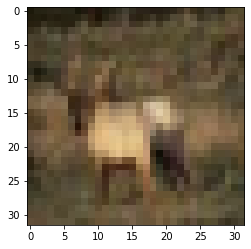

In [17]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3])

In [18]:
# sequential model
# Dense = Just your regular densely-connected NN layer.
from keras.models import Sequential 
from keras.layers import Flatten, Dense

model = Sequential([
    Dense(200, activation = "relu", input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation = "relu"),
    Dense(10, activation = "softmax")    
])


In [19]:
# the architecture using the functional API

from keras.layers import Input, Flatten, Dense
from keras.models import Model

input_layer = Input((32, 32, 3))
x = Flatten()(input_layer)

x = Dense(units=200, activation="relu")(x)
x = Dense(units=150, activation="relu")(x)

output_layer = Dense(units=num_classes, activation="softmax")(x)

model = Model(input_layer, output_layer)

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_5 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compiling the model

from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
# training the model
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 6s 112us/step - loss: 1.8384 - accuracy: 0.3363
Epoch 2/10
50000/50000 [==============================] - 5s 101us/step - loss: 1.6698 - accuracy: 0.4025
Epoch 3/10
50000/50000 [==============================] - 5s 103us/step - loss: 1.5875 - accuracy: 0.4350
Epoch 4/10
50000/50000 [==============================] - 5s 102us/step - loss: 1.5360 - accuracy: 0.4540
Epoch 5/10
50000/50000 [==============================] - 5s 101us/step - loss: 1.4968 - accuracy: 0.4666
Epoch 6/10
50000/50000 [==============================] - 5s 99us/step - loss: 1.4666 - accuracy: 0.4781
Epoch 7/10
50000/50000 [==============================] - 5s 99us/step - loss: 1.4367 - accuracy: 0.4873
Epoch 8/10
50000/50000 [==============================] - 5s 100us/step - loss: 1.4097 - accuracy: 0.4987
Epoch 9/10
50000/50000 [==============================] - 5s 100us/step - loss: 1.3909 - accuracy: 0.5037
Epoch 10/10
50000/50000 [=======================

In [25]:
# evaluate the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 57us/step


[1.4462562141418458, 0.4893999993801117]

In [27]:
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test, axis=-1)]

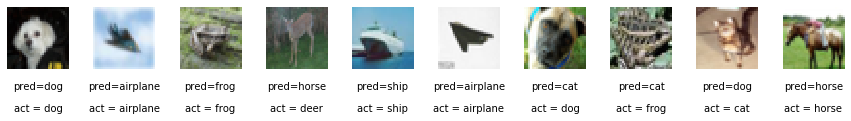

In [31]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred=" + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10 , ha='center', transform=ax.transAxes) 
    ax.imshow(img)

**improving the model**

**Convolutional neural networks**

Our last network doesnt take the spatial structure of the input images, in Keras, the Conv2D layer applies convolutions to an input tensor with two spatial dimensions (sucha as an image)

```
input_layer = Input(shape=(64,64,1))

conv_layer_1 = Conv2D(
    filters=2,
    kernel_size = (3,3),
    strides=1,
    padding="same"
)(input_layer)

```

In [2]:
import matplotlib.pyplot as plt
from scipy.ndimage import correlate
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import rescale, resize

(64, 64)


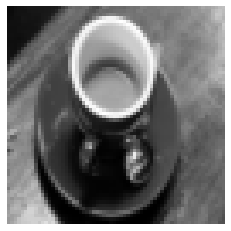

In [4]:
im = rgb2gray(data.coffee())
im = resize(im, (64,64))
print(im.shape)
plt.axis("off")
plt.imshow(im, cmap="gray")

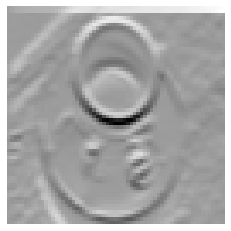

In [10]:
# horizontal edge filter

filter1 = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

new_image = np.zeros(im.shape)

im_pad = np.pad(im, 1, 'constant')

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

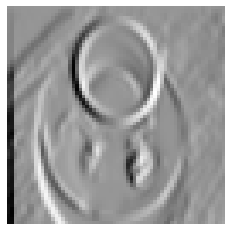

In [11]:
# vertical edge
filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

new_image = np.zeros(im.shape)

im_pad = np.pad(im,1, 'constant')

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

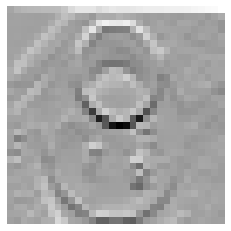

In [12]:
# horizontal edge filter with stride 2

filter1 = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im,1, 'constant')

for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

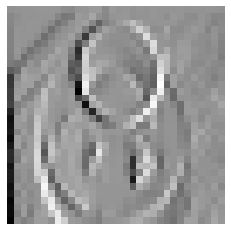

In [13]:
# vertical edge filter with stride 2

filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im,1, 'constant')

for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

*Convolutional solution with CIFAR-10*

In [4]:
from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Activation, LeakyReLU, Dropout
from keras.models import Model

input_layer = Input(shape=(32,32,3))

x = Conv2D(filters=32, kernel_size= 3, strides=1, padding="same")(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size= 3, strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size= 3, strides=1, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size= 3, strides=2, padding="same")(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)


x = Dense(units=10)(x)
output_layer = Activation("softmax")(x)

model = Model(input_layer, output_layer)


In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0   

In [11]:
# compiling the model

from keras.optimizers import Adam

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 17s 338us/step - loss: 1.5393 - accuracy: 0.4611 - val_loss: 1.2812 - val_accuracy: 0.5468
Epoch 2/10
50000/50000 [==============================] - 15s 307us/step - loss: 1.1493 - accuracy: 0.5934 - val_loss: 1.7615 - val_accuracy: 0.4160
Epoch 3/10
50000/50000 [==============================] - 16s 312us/step - loss: 0.9994 - accuracy: 0.6522 - val_loss: 0.9471 - val_accuracy: 0.6710
Epoch 4/10
50000/50000 [==============================] - 16s 320us/step - loss: 0.9148 - accuracy: 0.6799 - val_loss: 0.9021 - val_accuracy: 0.6893
Epoch 5/10
50000/50000 [==============================] - 16s 313us/step - loss: 0.8513 - accuracy: 0.7039 - val_loss: 0.9039 - val_accuracy: 0.6828
Epoch 6/10
50000/50000 [==============================] - 16s 319us/step - loss: 0.8010 - accuracy: 0.7209 - val_loss: 0.8230 - val_accuracy: 0.7129
Epoch 7/10
50000/50000 [==============================] 

In [12]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 0s 48us/step


[0.7957761764526368, 0.7293999791145325]

In [13]:
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test, axis=-1)]

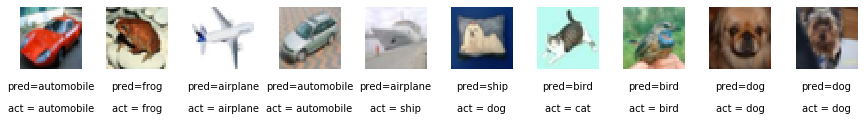

In [14]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis("off")
    ax.text(0.5, -0.35, "pred=" + str(preds_single[idx]), fontsize=10, ha="center", transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10 , ha='center', transform=ax.transAxes) 
    ax.imshow(img)